In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression


%matplotlib inline

## Step 1 : Data loading and Preprocessing

In [380]:
data=pd.read_csv("customer_purchase_data.csv")

In [381]:
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [383]:
data.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [384]:
data.duplicated().sum()

np.int64(112)

In [385]:
data=data.drop_duplicates()
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [386]:
data.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [387]:
data["Gender"].value_counts()

Gender
1    696
0    692
Name: count, dtype: int64

In [388]:
data["DiscountsAvailed"].value_counts()


DiscountsAvailed
4    249
5    247
3    246
1    219
2    217
0    210
Name: count, dtype: int64

## Step 2: Finding Correlation and Visualization

In [389]:
corr_matrix = data.corr()
corr_matrix['PurchaseStatus'].sort_values(ascending=False)

PurchaseStatus        1.000000
LoyaltyProgram        0.318059
DiscountsAvailed      0.296606
TimeSpentOnWebsite    0.282127
NumberOfPurchases     0.219116
AnnualIncome          0.191218
ProductCategory       0.014349
Gender                0.008856
Age                  -0.253598
Name: PurchaseStatus, dtype: float64

Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

<Axes: >

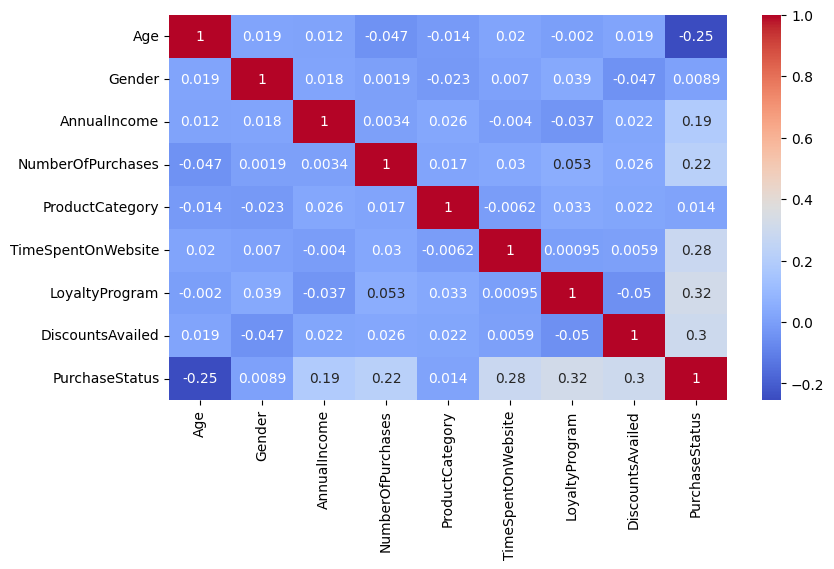

In [390]:
co_matrix = data.corr()
# correlation_matrix
plt.figure(figsize=(9,5))
sns.heatmap(co_matrix, annot=True, cmap='coolwarm')
# plt.show()


<Axes: xlabel='AnnualIncome', ylabel='PurchaseStatus'>

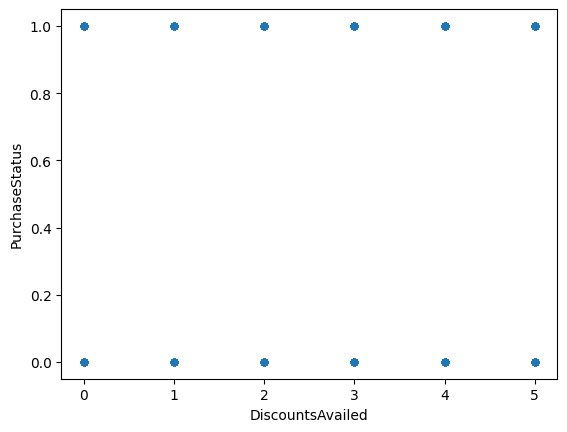

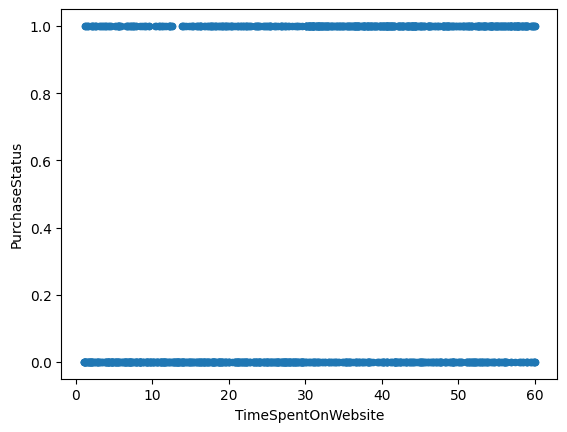

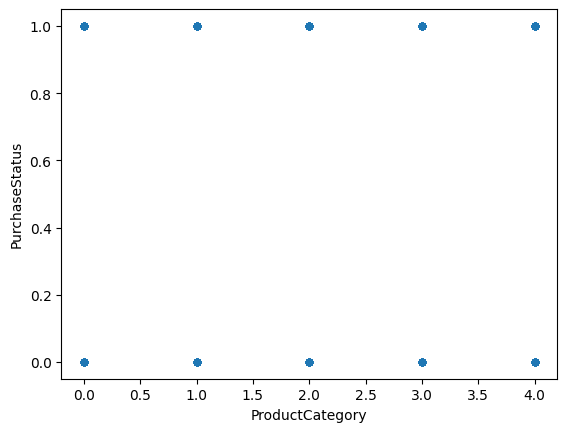

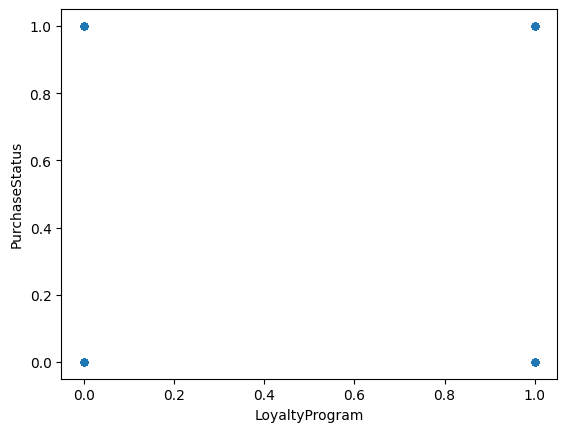

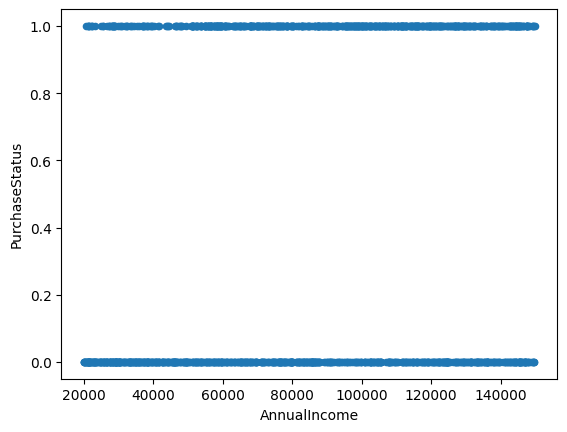

In [391]:

data.plot(kind = "scatter", x = 'DiscountsAvailed',y="PurchaseStatus")
data.plot(kind = "scatter", x = 'TimeSpentOnWebsite',y="PurchaseStatus")
data.plot(kind = "scatter", x = 'ProductCategory',y="PurchaseStatus")
data.plot(kind = "scatter", x = 'LoyaltyProgram',y="PurchaseStatus")
# data.plot(kind = "scatter", x = 'Age',y="PurchaseStatus")
data.plot(kind = "scatter", x = 'AnnualIncome',y="PurchaseStatus")


## Step 3: Feature Engineering and Split the data

In [392]:
def preprocessing(df,engineer_features=False):
    df=df.copy()

    
    
    if engineer_features == True:

        
        income_threshold = df['AnnualIncome'].quantile(0.65)
        df['High Income'] = df['AnnualIncome'].apply(lambda x: 1 if x >= income_threshold else 0)
        
       

    y= df["PurchaseStatus"]
    x= df.drop(["PurchaseStatus"],axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)

    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)
    


    return x_train, x_test, y_train, y_test,df
    

## Step 4: Train and Test The data (Without feature engineering)

In [393]:

x_train, x_test, y_train, y_test,df=preprocessing(data,engineer_features=False)
x_train

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
582,0.843482,-1.023974,1.696717,-0.972884,0.715693,0.649114,-0.707653,-0.939894
1453,0.908582,0.976587,-0.033407,0.574628,0.008017,-1.080516,-0.707653,0.819689
407,0.713282,0.976587,0.492461,-1.144830,0.715693,-0.239341,1.413122,0.819689
1100,1.689780,0.976587,-0.844625,-1.660667,-0.699659,-1.142257,1.413122,0.233161
1112,0.192484,0.976587,1.641728,-1.488721,-1.407336,-1.122582,-0.707653,-1.526422
...,...,...,...,...,...,...,...,...
748,-1.435012,0.976587,0.604779,-0.113155,1.423370,1.735059,-0.707653,1.406217
954,1.624680,-1.023974,-0.008848,0.746574,-0.699659,-0.151316,1.413122,1.406217
1166,1.234081,-1.023974,-0.120315,-0.628992,0.008017,0.833765,-0.707653,0.819689
235,-0.393415,0.976587,-1.444097,-1.144830,1.423370,1.739984,-0.707653,0.233161


In [394]:
model = LogisticRegression()
model=model.fit(x_train, y_train)

acc = model.score(x_test,y_test)

print("Test Accuracy: {:.3f}%".format(acc*100))

Test Accuracy: 84.652%


## Step 4: Train and Test The data (With feature engineering)

In [395]:
x_train, x_test, y_train, y_test,df = preprocessing(data, engineer_features=True)
x_train

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,High Income
582,0.843482,-1.023974,1.696717,-0.972884,0.715693,0.649114,-0.707653,-0.939894,1.393709
1453,0.908582,0.976587,-0.033407,0.574628,0.008017,-1.080516,-0.707653,0.819689,-0.717510
407,0.713282,0.976587,0.492461,-1.144830,0.715693,-0.239341,1.413122,0.819689,-0.717510
1100,1.689780,0.976587,-0.844625,-1.660667,-0.699659,-1.142257,1.413122,0.233161,-0.717510
1112,0.192484,0.976587,1.641728,-1.488721,-1.407336,-1.122582,-0.707653,-1.526422,1.393709
...,...,...,...,...,...,...,...,...,...
748,-1.435012,0.976587,0.604779,-0.113155,1.423370,1.735059,-0.707653,1.406217,1.393709
954,1.624680,-1.023974,-0.008848,0.746574,-0.699659,-0.151316,1.413122,1.406217,-0.717510
1166,1.234081,-1.023974,-0.120315,-0.628992,0.008017,0.833765,-0.707653,0.819689,-0.717510
235,-0.393415,0.976587,-1.444097,-1.144830,1.423370,1.739984,-0.707653,0.233161,-0.717510


In [396]:
model = LogisticRegression()
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)

print("Test Accuracy: {:.3f}%".format(acc * 100))

Test Accuracy: 86.091%
